In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

import sys
sys.path.append('./')

from feature import *

In [2]:
train_org_df = pd.read_csv('./inputdata/train.csv')
test_org_df = pd.read_csv('./inputdata/test.csv')

In [3]:
train_df = train_org_df.copy()
test_df = test_org_df.copy()

In [4]:
pd.set_option('display.max_columns', 50)

In [5]:
display(train_df.describe())
display(train_df.describe(include=['O']))
display(train_df.info())

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Jalsevac, Mr. Ivan",male,347082,C23 C25 C27,S
freq,1,577,7,4,644


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

In [6]:
display(test_df.describe())
display(test_df.describe(include=['O']))
display(test_df.info())

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Ostby, Miss. Helene Ragnhild",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


None

In [7]:
survived_rate = train_df.groupby('Survived').agg({'PassengerId': 'nunique'}).copy()
survived_rate['survived_rate'] = survived_rate['PassengerId'] / survived_rate['PassengerId'].sum()
survived_rate

,PassengerId,survived_rate
Survived,,
0,549,0.616162
1,342,0.383838


In [8]:
train_df[['Survived', 'Pclass']].groupby('Pclass').mean().sort_values(by='Pclass', ascending=False).style.bar(color=["blue"], axis=0, align='mid')

,Survived
Pclass,
3,0.242363
2,0.472826
1,0.629630


<AxesSubplot:>

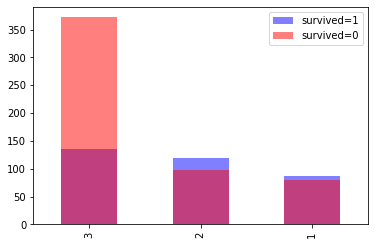

In [9]:
train_df.query('Survived == 1')['Pclass'].value_counts().plot.bar(alpha=0.5, label='survived=1', legend=True, color='blue')
train_df.query('Survived == 0')['Pclass'].value_counts().plot.bar(alpha=0.5, label='survived=0', legend=True, color='red')

In [10]:
train_df[['Survived', 'Sex']].groupby('Sex').mean().sort_values(by='Sex', ascending=False).style.bar(color='blue', axis=0, align='mid')

,Survived
Sex,
male,0.188908
female,0.742038


<AxesSubplot:>

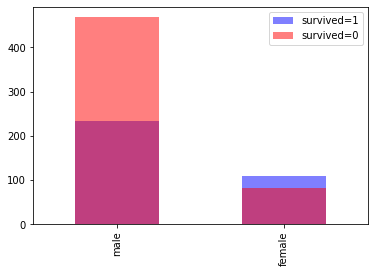

In [11]:
train_df.query('Survived == 1')['Sex'].value_counts().plot.bar(alpha=0.5, label='survived=1', legend=True, color='blue')
train_df.query('Survived == 0')['Sex'].value_counts().plot.bar(alpha=0.5, label='survived=0', legend=True, color='red')

In [12]:
def calc_family_size(x):
    return x['SibSp'] + x['Parch'] + 1

In [13]:
train_df['FamilySize'] = train_df.apply(lambda x: calc_family_size(x), axis=1)
test_df['FamilySize'] = test_df.apply(lambda x: calc_family_size(x), axis=1)
train_df[['Survived', 'FamilySize']].groupby('FamilySize').mean().sort_values(by='FamilySize', ascending=False).style.bar(color=["blue"], axis=0, align='mid')

,Survived
FamilySize,
11,0.000000
8,0.000000
7,0.333333
6,0.136364
5,0.200000
4,0.724138
3,0.578431
2,0.552795
1,0.303538


<AxesSubplot:ylabel='Frequency'>

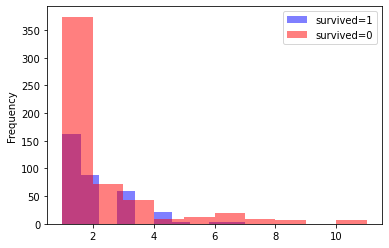

In [14]:
train_df.query('Survived == 1')['FamilySize'].plot.hist(alpha=0.5, label='survived=1', legend=True, color='blue')
train_df.query('Survived == 0')['FamilySize'].plot.hist(alpha=0.5, label='survived=0', legend=True, color='red')

In [15]:
def calc_is_alone(x):
    if x['FamilySize'] == 1:
        return 1
    return 0

In [16]:
train_df['IsAlone'] = train_df.apply(lambda x: calc_is_alone(x), axis=1)
test_df['IsAlone'] = test_df.apply(lambda x: calc_is_alone(x), axis=1)
train_df[['Survived', 'IsAlone']].groupby('IsAlone').mean().sort_values(by='IsAlone', ascending=False).style.bar(color=["blue"], axis=0, align='mid')

,Survived
IsAlone,
1,0.303538
0,0.505650


<AxesSubplot:ylabel='Frequency'>

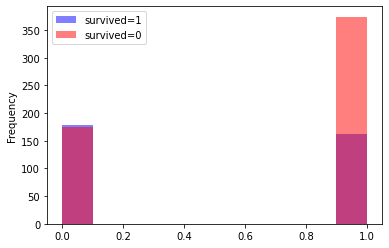

In [17]:
train_df.query('Survived == 1')['IsAlone'].plot.hist(alpha=0.5, label='survived=1', legend=True, color='blue')
train_df.query('Survived == 0')['IsAlone'].plot.hist(alpha=0.5, label='survived=0', legend=True, color='red')

In [18]:
train_df['Embarked'] = train_df['Embarked'].fillna('S')
test_df['Embarked'] = test_df['Embarked'].fillna('S')
train_df[['Survived', 'Embarked']].groupby('Embarked').mean().sort_values(by='Embarked', ascending=False).style.bar(color=["blue"], axis=0, align='mid')

,Survived
Embarked,
S,0.339009
Q,0.389610
C,0.553571


<AxesSubplot:>

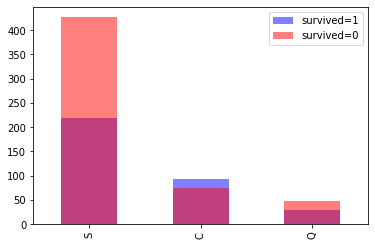

In [19]:
train_df.query('Survived == 1')['Embarked'].value_counts().plot.bar(alpha=0.5, label='survived=1', legend=True, color='blue')
train_df.query('Survived == 0')['Embarked'].value_counts().plot.bar(alpha=0.5, label='survived=0', legend=True, color='red')

In [20]:
train_df['Fare'] = train_df['Fare'].fillna(train_df['Fare'].median())
test_df['Fare'] = test_df['Fare'].fillna(train_df['Fare'].median())

In [21]:
train_df['CategoricalFare'] = pd.qcut(train_df['Fare'], 4, labels=[1, 2, 3, 4])
test_df['CategoricalFare'] = pd.qcut(test_df['Fare'], 4, labels=[1, 2, 3, 4])
train_df[['Survived', 'CategoricalFare']].groupby('CategoricalFare').mean().style.bar(color=['blue'], axis=0, align='mid')

,Survived
CategoricalFare,
1,0.197309
2,0.303571
3,0.454955
4,0.581081


<AxesSubplot:>

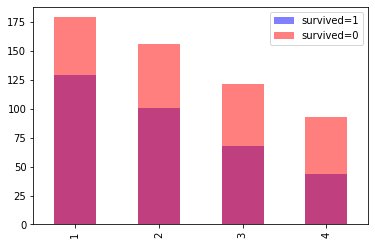

In [22]:
train_df.query('Survived == 1')['CategoricalFare'].value_counts().plot.bar(alpha=0.5, label='survived=1', legend=True, color='blue')
train_df.query('Survived == 0')['CategoricalFare'].value_counts().plot.bar(alpha=0.5, label='survived=0', legend=True, color='red')

In [23]:
print(train_df['Age'].isnull().sum(), test_df['Age'].isnull().sum())

177 86


In [24]:
def fill_age(dataset):
    age_avg = dataset['Age'].mean()
    age_std = dataset['Age'].std()
    age_null_count = dataset['Age'].isnull().sum()
    age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
    dataset.loc[np.isnan(dataset['Age']), 'Age'] = age_null_random_list
    dataset['Age'] = dataset['Age'].astype(int)

In [25]:
fill_age(train_df)
fill_age(test_df)

In [26]:
print(train_df['Age'].isnull().sum(), test_df['Age'].isnull().sum())

0 0


In [27]:
_, age_bins = pd.cut(train_df['Age'], 5, retbins=True)
print(age_bins)
train_df['CategoricalAge'] = pd.cut(train_df['Age'], 5, labels=[1, 2, 3, 4, 5])
test_df['CategoricalAge'] = pd.cut(test_df['Age'], 5, labels=[1, 2, 3, 4, 5])
train_df[['Survived', 'CategoricalAge']].groupby('CategoricalAge').mean().style.bar(color=['blue'], axis=0, align='mid')

[-0.08 16.   32.   48.   64.   80.  ]


,Survived
CategoricalAge,
1,0.500000
2,0.348519
3,0.388889
4,0.434783
5,0.090909


<AxesSubplot:>

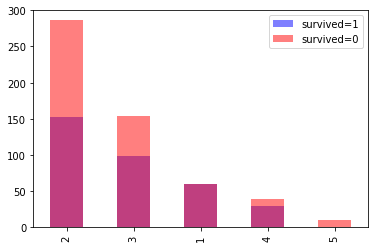

In [28]:
train_df.query('Survived == 1')['CategoricalAge'].value_counts().plot.bar(alpha=0.5, label='survived=1', legend=True, color='blue')
train_df.query('Survived == 0')['CategoricalAge'].value_counts().plot.bar(alpha=0.5, label='survived=0', legend=True, color='red')

In [29]:
import re

rare_title = ['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona']
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    if title_search:
        t = title_search.group(1)
        if t in rare_title:
            return 'Rare'
        elif t in ['Mlle', 'Mss']:
            return 'Miss'
        elif t in ['Mms']:
            return 'Mr'
        else:
            return t
    return ''

In [30]:
train_df['Title'] = train_df['Name'].apply(get_title)
test_df['Title'] = test_df['Name'].apply(get_title)
train_df[['Survived', 'Title']].groupby('Title').mean().style.bar(color=['blue'], axis=0, align='mid')

,Survived
Title,
Master,0.575000
Miss,0.701087
Mme,1.000000
Mr,0.156673
Mrs,0.792000
Ms,1.000000
Rare,0.347826


In [31]:
print(train_df['Title'].isnull().sum(), test_df['Title'].isnull().sum())

0 0


<AxesSubplot:>

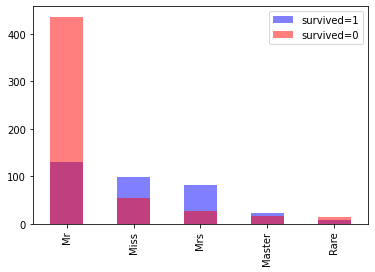

In [32]:
train_df.query('Survived == 1')['Title'].value_counts().plot.bar(alpha=0.5, label='survived=1', legend=True, color='blue')
train_df.query('Survived == 0')['Title'].value_counts().plot.bar(alpha=0.5, label='survived=0', legend=True, color='red')

In [33]:
train_df['SexCategory'] = train_df['Sex'].map({'female': 0, 'male': 1}).astype(int)
test_df['SexCategory'] = test_df['Sex'].map({'female': 0, 'male': 1}).astype(int)

<AxesSubplot:>

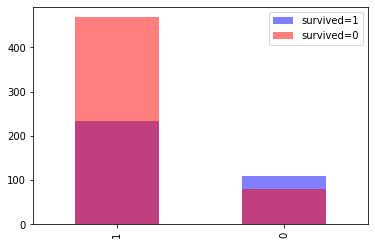

In [34]:
train_df.query('Survived == 1')['SexCategory'].value_counts().plot.bar(alpha=0.5, label='survived=1', legend=True, color='blue')
train_df.query('Survived == 0')['SexCategory'].value_counts().plot.bar(alpha=0.5, label='survived=0', legend=True, color='red')

In [35]:
title_mapping = {'Mr': 1, 'Miss': 2, 'Mrs': 3, 'Master': 4, 'Rare': 5}

train_df['Title'] = train_df['Title'].map(title_mapping)
train_df['Title'] = train_df['Title'].fillna(0)

test_df['Title'] = test_df['Title'].map(title_mapping)
test_df['Title'] = test_df['Title'].fillna(0)

In [36]:
train_df['Embarked'] = train_df['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
test_df['Embarked'] = test_df['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [37]:
train_df['CategoricalFare'] = train_df['CategoricalFare'].astype(int)
test_df['CategoricalFare'] = test_df['CategoricalFare'].astype(int)

In [38]:
train_df['CategoricalAge'] = train_df['CategoricalAge'].astype(int)
test_df['CategoricalAge'] = test_df['CategoricalAge'].astype(int)

In [39]:
train_df_ready = train_df.copy()
test_df_ready = test_df.copy()

drop_elements = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp', 'Parch', 'Sex']
train_df_ready.drop(drop_elements, axis=1, inplace=True)
test_df_ready.drop(drop_elements, axis=1, inplace=True)

print(train_df_ready.info())
print(test_df_ready.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Survived         891 non-null    int64  
 1   Pclass           891 non-null    int64  
 2   Age              891 non-null    int64  
 3   Fare             891 non-null    float64
 4   Embarked         891 non-null    int64  
 5   FamilySize       891 non-null    int64  
 6   IsAlone          891 non-null    int64  
 7   CategoricalFare  891 non-null    int64  
 8   CategoricalAge   891 non-null    int64  
 9   Title            891 non-null    float64
 10  SexCategory      891 non-null    int64  
dtypes: float64(2), int64(9)
memory usage: 76.7 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Pclass           418 non-null    int64 

In [40]:
from sklearn.metrics import log_loss, accuracy_score
from sklearn.model_selection import KFold
from xgboost import XGBClassifier

scores_accuracy = []
scores_logloss = []

train_x = train_df_ready.drop('Survived', axis=1).copy()
train_y = train_df_ready['Survived'].copy()
test_x = test_df_ready.copy()

accuracy = 0
logloss = 0

kf = KFold(n_splits=4, shuffle=True, random_state=71)
for tr_idx, va_idx in kf.split(train_x):
    tr_x, va_x = train_x.iloc[tr_idx], train_x.iloc[va_idx]
    tr_y, va_y = train_y.iloc[tr_idx], train_y.iloc[va_idx]

    model = XGBClassifier(n_estimators=20, random_state=71, eval_metric='logloss', use_label_encoder=False)
    model.fit(tr_x, tr_y)

    va_pred = model.predict_proba(va_x)[:, 1]
    # print(model.classes_) -> [0 1]
    # set it to 0.5 out of nowhere, but how we can pick the best threshold?
    va_label = np.where(va_pred > 0.5, 1, 0)
    logloss = log_loss(va_y, va_label)
    accuracy = accuracy_score(va_y, va_label)
    
    scores_accuracy.append(accuracy)
    scores_logloss.append(logloss)

logloss = np.mean(scores_logloss)
accuracy = np.mean(scores_accuracy)
print(f"logloss: {logloss:.4f}, accuracy: {accuracy:.4f}")

logloss: 5.6988, accuracy: 0.8350


In [41]:
model = XGBClassifier(n_estimators=20, random_state=71, eval_metric='logloss', use_label_encoder=False)
model.fit(train_x, train_y)

pred = model.predict_proba(test_x)[:, 1]
# print(model.classes_)
pred_label = np.where(pred > 0.5, 1, 0)

result_df = pd.DataFrame(pred_label)
print(result_df.shape, test_df_ready.shape)

(418, 1) (418, 10)


In [42]:
submission = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': pred_label
})

In [43]:
submission.to_csv('./inputdata/submission.csv', index=False)